In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Next few lines are needed to integrate the kaggle dataset ([Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)) into google colab**

In [ ]:
!pip install --quiet kaggle

In [ ]:
from google.colab import files 
files.upload() #upload the json file that contains api key from kaggle account

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"anushkapatil","key":"9c2ef954c959036ef0d22a462cf32d3b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/.  

!chmod 600 ~/.kaggle/kaggle.json #altering permissions

In [ ]:
!kaggle datasets download -d lava18/google-play-store-apps #this is the api of the dataset obtained from kaggle

google-play-store-apps.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
zip_file= ZipFile('google-play-store-apps.zip')  #this downloaded zip file contains three csv file
data=pd.read_csv(zip_file.open('googleplaystore.csv'))  #we choose the googleplaystore.csv and load it into a dataframe called 'data' using pandas


In [ ]:
data.head() #prints first 5 entries of the dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.info() #result shows there are 10841 entries in the dataframe , it also lists the columns present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

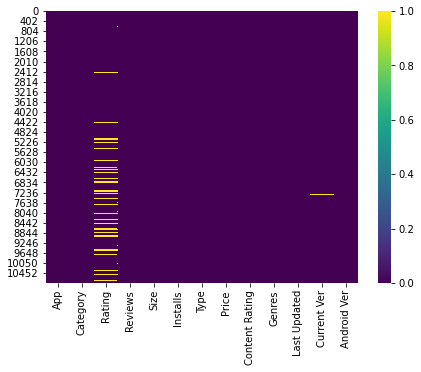

In [ ]:
plt.figure(figsize=(7, 5))   
sns.heatmap(data.isnull(), cmap='viridis')      
data.isnull().any() #shows that Rating,Type,Content Rating,Current Ver and Android Ver cloumns have misisng value

In [ ]:
data.isnull().sum() # shows the number of missing value in each column respectively

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median()) #we replace the missing values of column Rating by the median of all Rating values

In [ ]:
#we remove all the entries that have missing column values in Current Ver,Content Rating, Android Ver and Type
#we remove these entries corresponding to these columns as they have very few missing values
data = data[pd.notnull(data['Current Ver'])]
data = data[pd.notnull(data['Content Rating'])]
data = data[pd.notnull(data['Android Ver'])]
data = data[pd.notnull(data['Type'])]


In [ ]:
data.isnull().sum() #to confirm that there are no further misisng values present 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
data.info() #we are left with 10829 entries now, out of 10841 (remaining are removed due to the presence of missing values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


## ***Studying each colum attribute in detail and cleaning it***

*1*. Size

In [ ]:
#function to convert MB and KB in bytes
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

data["Size"] = data["Size"].map(change_size) #update the Size column with these new values

In [ ]:
data.Size.fillna(method = 'ffill', inplace = True) #filling null values

Text(0, 0.5, 'Frequency')

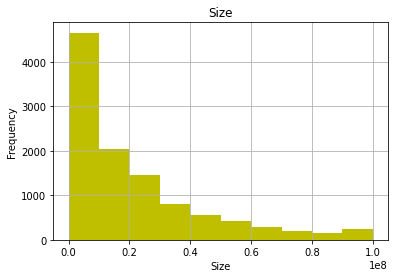

In [ ]:
data.hist(column='Size', color='y') 
plt.xlabel('Size')
plt.ylabel('Frequency')

2. Installs


In [ ]:
data.Installs.value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

In [ ]:
 #as linear regression deals with float values, we will remove any additional symbols present
data.Installs=data.Installs.apply(lambda x: x.strip('+'))  #remove symbol '+'
data.Installs=data.Installs.apply(lambda x: x.replace(',','')) #remove symbol ','


In [ ]:
data['Installs'] = data['Installs'].astype(float)

In [ ]:
data.Installs.value_counts()

1.000000e+06    1578
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1052
1.000000e+03     905
5.000000e+06     752
1.000000e+02     718
5.000000e+05     538
5.000000e+04     478
5.000000e+03     476
1.000000e+08     409
1.000000e+01     385
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      14
Name: Installs, dtype: int64

3.Reviews

In [ ]:
data.Reviews.str.isnumeric().sum() #checking if all 10829 Reviews are numeric values

10829

In [ ]:
data['Reviews'] = data['Reviews'].astype(int) #converting 'object' type Reviews to type 'int'

4.Rating

In [ ]:
#checking the range of the values of the Rating column
print("Range: ", data.Rating.min(),"-",data.Rating.max()) 

Range:  1.0 - 5.0


Text(0, 0.5, 'Frequency')

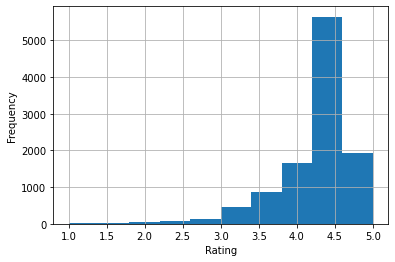

In [ ]:
data.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

5.Type

In [ ]:
data.Type.value_counts() #Prints the number of Free and Paid app

Free    10032
Paid      797
Name: Type, dtype: int64

In [ ]:
#Function that converts the Type value to '0' for free app and '1' for paid app
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

data['Type'] = data['Type'].map(type_cat) #updated type value

6.Price

In [ ]:
data.Price=data.Price.apply(lambda x: x.strip('$'))  #removing the symbol '$'
data['Price'] = data['Price'].astype(float)

In [ ]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

7.Category

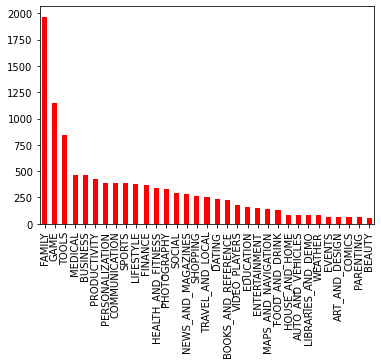

In [ ]:
data.Category.value_counts().plot(kind='bar',color='r')

In [ ]:
#giving discrete dummy values to discrete Categories and adding them in a new Column 'Category_new'
CategoryL = data.Category.unique()
CategoryDict = {}
for i in range(len(CategoryL)):
    CategoryDict[CategoryL[i]] = i
data['Category_new'] = data['Category'].map(CategoryDict).astype(int)

8.Content Rating

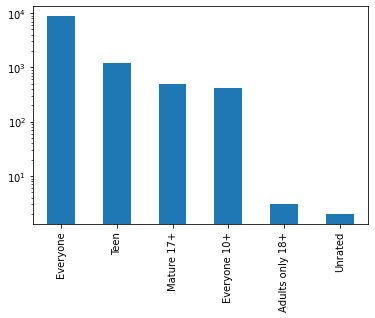

In [ ]:
data.columns = data.columns.str.replace(' ', '_') #for ex: replacing column name 'Content Rating' with 'Content_Rating'
data.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

In [ ]:
#giving discrete dummy values to discrete Content Rating and updating them in the column
RatingL = data['Content_Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
data['Content_Rating'] = data['Content_Rating'].map(RatingDict).astype(int)

9.Genres

In [ ]:
#giving discrete dummy values to discrete Genres and adding them in a new Column 'Genre_new'
GenresL = data.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
data['Genres_new'] = data['Genres'].map(GenresDict).astype(int)

10.Remaining

In [ ]:
#dropping the columns that are not relevant for our linear regression
data.drop(labels = ['Last_Updated','Current_Ver','Android_Ver','App'], axis = 1, inplace = True)

***Final Database***

In [ ]:
data.head() #first 5 entries of the updated dataframe

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Category_new,Genres_new
0,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0,0.0,0,Art & Design;Creativity,0,2


In [ ]:
data.info() #checking if all the fields except 'Category' and 'Genres' are of either 'int64' or 'float64' type for regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10829 non-null  object 
 1   Rating          10829 non-null  float64
 2   Reviews         10829 non-null  int64  
 3   Size            10829 non-null  float64
 4   Installs        10829 non-null  float64
 5   Type            10829 non-null  int64  
 6   Price           10829 non-null  float64
 7   Content_Rating  10829 non-null  int64  
 8   Genres          10829 non-null  object 
 9   Category_new    10829 non-null  int64  
 10  Genres_new      10829 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1015.2+ KB


## **Linear Regression Model Building**


In [ ]:
print('Intercept: \n', model.intercept_) #value of b0X = data.drop(labels = ['Category','Rating','Genres'],axis = 1) #We remove the irrelevant columns
Y = data.Rating #Rating column is to be predicted and is assigned to Y



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30) #split 10829 entries into training sample(70%) amd test sample(30%)
model = LinearRegression() #model type will be linear regression

In [ ]:
 #fitting the model with the training set 
model.fit(X_train,Y_train)

In [ ]:
print('Intercept: \n', model.intercept_) #value of b0

In [ ]:
coeff_df = pd.DataFrame(model.coef_, ['Reviews','Size','Installs','Type', 'Price', 'Content_Rating','Category_new','Genres_new'], columns=['Coefficient'])  
coeff_df
#these coefficients are the values of b1,b2,b3....b8 respectively and they tell how the nature of dependence of Rating on these column attributes
#if the coefficient is positive/negative then Rating increases/decreases as the value of the attribute increases 


,Coefficient
Reviews,7.715016e-09
Size,1.294742e-09
Installs,9.842772e-11
Type,1.187820e-01
Price,-7.925088e-04
Content_Rating,-9.658003e-03
Category_new,-4.471535e-04
Genres_new,-2.641828e-04


In [ ]:
Y_pred = model.predict(X_test) # Ratings are predicted using the regression model and saved in Y_pred
Y_pred

array([4.15857632, 4.19910952, 4.19990655, ..., 4.28652655, 4.27709548,
       4.25492724])

In [ ]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 
df2=df1.head(20) 

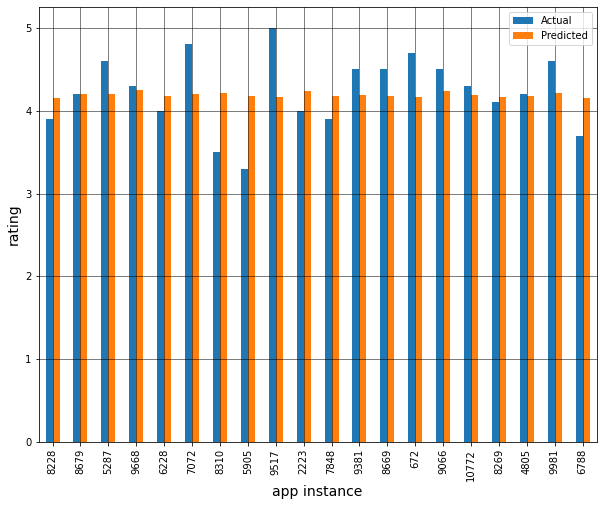

In [ ]:
df2.plot(kind='bar',figsize=(10,8)) #actual vs predicted Rating values
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
plt.xlabel('app instance',color='black',fontsize=14)
plt.ylabel('rating',color='black',fontsize = 14)

plt.show()

Text(0, 0.5, 'Predicted Y')

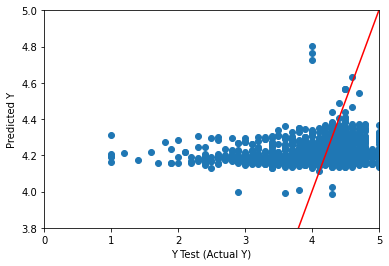

In [ ]:
plt.scatter(Y_test,Y_pred)  

plt.ylim(3.8,5) 
plt.xlim(0,5)

x = np.linspace(0, 5, 30)
plt.plot(x, x + 0,'-r', linestyle='solid')

plt.xlabel('Y Test (Actual Y)')
plt.ylabel('Predicted Y')

**Evaluation Metrics**

In [ ]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(Y_test,Y_pred)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(Y_test,Y_pred)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(Y_test,Y_pred)))

Mean Squared Error: 0.21092912419568813
Mean absolute Error: 0.3154977864080546
Mean squared Log Error: 0.009971592215083131


# **Regression using statsmodels , Least Square method**

In [ ]:
X = X.astype('float64') #explicitly converting all int type values to float type

In [ ]:
import statsmodels.api as sm
X_opt = sm.add_constant(X) #constant column is needed in this method for b0 calculation
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit() #fitting the model 'regressor_OLS'
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     15.77
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           2.43e-23
Time:                        16:13:11   Log-Likelihood:                -7364.8
No. Observations:               10829   AIC:                         1.475e+04
Df Residuals:                   10820   BIC:                         1.481e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.2006      0.014    308.972      0.000       4.174       4.227
Reviews         7.958e-09   2.07e-09      3.853      0.000    3.91e-09     1.2e-08
Size            1.349e-09    2.1e-10      6.434      0.000    9.38e-10    1.76e-09
Installs        6.903e-11   7.06e-11      0.978      0.328   -6.93e-11    2.07e-10
Type               0.0944      0.018      5.204      0.000       0.059       0.130
Price             -0.0009      0.000     -3.046      0.002      -0.001      -0.000
Content_Rating    -0.0122      0.006     -1.988      0.047      -0.024      -0.000
Category_new      -0.0012      0.001     -1.048      0.295      -0.003       0.001
Genres_new        -0.0002      0.000     -0.698      0.485      -0.001       0.000
==============================================================================
Omnibus:                     4855.350   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31883.647
Skew:                          -2.050   Prob(JB):                         0.00
Kurtosis:                      10.338   Cond. No.                     3.44e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_opt, Y, test_size = 0.2, random_state = 0) #repeating the train-test split this time in 80%-20% ratio
model2 = LinearRegression() #building new model
model2.fit(X_train2, Y_train2)
Y_pred2 = model2.predict(X_test2)
Y_pred2

array([4.20618877, 4.31811391, 4.22513077, ..., 4.28519578, 4.27508703,
       4.20205039])

**Some important graphs for the Regression model**

In [ ]:
residuals= Y_test2-Y_pred2 

In [ ]:
# normalized residuals
model_norm_residuals = regressor_OLS.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(residuals)
# leverage, from statsmodels internals
model_leverage = regressor_OLS.get_influence().hat_matrix_diag

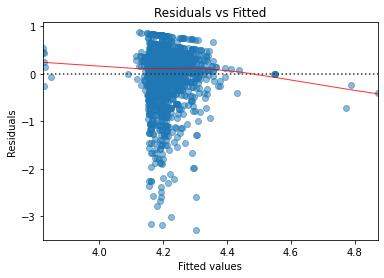

In [ ]:
plot1 = plt.figure()
plot1.axes[0] = sns.residplot(Y_pred2, residuals,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot1.axes[0].set_title('Residuals vs Fitted')
plot1.axes[0].set_xlabel('Fitted values')
plot1.axes[0].set_ylabel('Residuals');

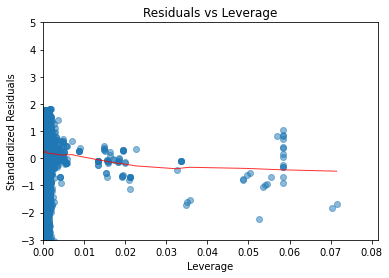

In [ ]:
plot2 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot2.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot2.axes[0].set_ylim(-3, 5)
plot2.axes[0].set_title('Residuals vs Leverage')
plot2.axes[0].set_xlabel('Leverage')
plot2.axes[0].set_ylabel('Standardized Residuals');